Let's start just printing out a selection of events to check it's working. This creates a DataFrame which contains the parsed JSON as a collection of data in named columns. So, the sequence of events from the cars has been transformed into something that we can query like a relational database table.

First we need to import the data. Since it is still stored in Object Storage, we need to download it from there and upload it into the Watson Studio Workspace.

To do so, please go first to your Object Storage GUI (go to IBM Cloud Dashboard and click on your "Object Storage OpenStack Swift" service), you can download it from there via the GUI. 

Afterwards, click on the 10/01 symbol in the action bar of Watson Studio (you can find it in the upper right corner), this takes you to the data assets associated with this project. You  can upload the file via Drag&Drop there. This will automatically store the file in the new S3 version of Object Storage.

The file will appear there. Please click in the empty cell below, and then on "Insert to code" just below the file name and select "Insert SparkSession Data Frame". This will generate the code for you.

Before you can let it run, you need to check if the variable name is correct. It will look like this:


`df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('data.csv', 'test1-donotdelete-pr-gg26yilfdlbrpy'))
df_data_1.take(5)
`
Please correct the variable name of the data frame to df (in this example df_data_1 -> df). 

Now you are ready to run the cell.

[Row(distance=100.93539716989521, fuelCapacity=11.0, fuelRemaining=5.612936452902985, refills=0, ts='2018-06-06T15:57:45.491', vehicleNumber='car4'),
 Row(distance=11.29986020963233, fuelCapacity=11.0, fuelRemaining=8.681637340925219, refills=0, ts='2018-06-06T14:42:45.491', vehicleNumber='car14'),
 Row(distance=35.72674606375544, fuelCapacity=11.0, fuelRemaining=7.632006834180967, refills=0, ts='2018-06-06T14:57:45.491', vehicleNumber='car3'),
 Row(distance=197.45279064700304, fuelCapacity=11.0, fuelRemaining=0.9331529196217954, refills=0, ts='2018-06-06T16:57:45.491', vehicleNumber='car14'),
 Row(distance=53.23101437847688, fuelCapacity=11.0, fuelRemaining=7.276805663090892, refills=0, ts='2018-06-06T15:12:45.491', vehicleNumber='car2')]

Now, let's see which cars have refilled with fuel most frequently. Start by grouping the data by vehicle number, and then aggregate the data counting by refills. Finally, order the resulting set.

In [3]:
df.groupBy('vehicleNumber').agg({'refills':'count'}).orderBy('count(refills)').show()

+-------------+--------------+
|vehicleNumber|count(refills)|
+-------------+--------------+
|        car14|           272|
|        car19|           283|
|        car13|           284|
|        car20|           284|
|        car15|           287|
|         car4|           288|
|         car5|           291|
|         car6|           291|
|         car8|           292|
|         car2|           294|
|        car12|           294|
|        car17|           294|
|         car9|           297|
|        car18|           306|
|         car3|           307|
|         car7|           309|
|        car10|           309|
|         car1|           316|
|        car16|           320|
|        car11|           334|
+-------------+--------------+



Let's see which car drove the furthest distance.

In [4]:
df.groupBy('vehicleNumber').agg({'distance':'max'}).orderBy('max(distance)', ascending=False).take(1)

[Row(vehicleNumber='car13', max(distance)=67254.66293420878)]

We can also plot the data in-line in the notebook. For example, this code creates an array of the fuelRemaining values from the events and then plots a histogram. There are a wide range of options to configure the charts and style them.

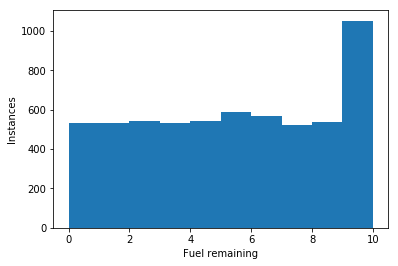

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.registerTempTable('carevents')
xx = []
d = sqlContext.sql("select fuelRemaining from carevents").collect()
for row in d:
    xx.append(int(getattr(row, "fuelRemaining")))
plt.hist(xx)
plt.xlabel('Fuel remaining')
plt.ylabel('Instances')
plt.show()